## 제일 기본 실시간 영상 코드

In [1]:
import traitlets
import ipywidgets
from IPython.display import display
from jetbot import Camera, bgr8_to_jpeg

camera = Camera.instance(width=300, height=300)

#카메라로 찍은 frame 을 띄워줄 image 객체 생성, 크기를 맞출 필요는 없다.
image = ipywidgets.Image(format='jpeg', width=300, height=300) 
camera_link = traitlets.dlink((camera, 'value'), (image, 'value'), transform=bgr8_to_jpeg)

display(image)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…

In [8]:
# 카메라 시작. camera.stop()을 했더라도 이걸로 켤 수 있다.
camera.start()

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/jetbot-0.4.0-py3.6.egg/jetbot/camera.py", line 45, in _capture_frames
    self.value = image
  File "/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py", line 588, in __set__
    self.set(obj, value)
  File "/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py", line 577, in set
    obj._notify_trait(self.name, old_value, new_value)
  File "/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py", line 1210, in _notify_trait
    type='change',
  File "/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py", line 1215, in notify_change
    return self._notify_observers(change)
  File "/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py", line 125

In [ ]:
# 카메라 중지. 다른 주피터 열기 전에 stop해줘야함.
camera.stop()

## 이미지 HSV 실시간 알아내기
- 중앙부분에 HSV 걷어내기

In [1]:
import cv2
import time
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from jetbot import Camera, bgr8_to_jpeg

# JetBot 카메라 인스턴스 생성
camera = Camera.instance(width=300, height=300)

# 이미지 표시를 위한 위젯 생성
image_widget = widgets.Image(format='jpeg', width=300, height=300)
display(image_widget)

# 특정 위치의 HSV 값을 읽는 함수
def get_hsv_value(frame, x, y):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    return hsv_frame[y, x]

# HSV 값을 출력할 좌표 설정
x, y = 150, 150

# 주기적으로 이미지를 처리하는 함수
def update_frame():
    while True:
        frame = camera.value
        
        # 원 그리기 (중심 좌표 (150, 150), 반지름 5, 색상 (0, 0, 255), 두께 2)
        cv2.circle(frame, (x, y), 5, (0, 0, 255), 2)
        
        # HSV 값 가져오기
        hsv_value = get_hsv_value(frame, x, y)
        
        # HSV 값을 1초마다 출력
        current_time = time.time()
        if current_time - update_frame.last_hsv_print_time >= 1.0:
            print(f"HSV at ({x}, {y}): {hsv_value}")
            update_frame.last_hsv_print_time = current_time
        
        # 프레임을 JPEG로 변환하여 위젯에 설정
        image_widget.value = bgr8_to_jpeg(frame)
        
        # 약간의 딜레이 추가
        time.sleep(0.1)

# 마지막 HSV 출력 시간을 초기화
update_frame.last_hsv_print_time = time.time()

# 주기적으로 프레임을 업데이트
update_frame()


Image(value=b'', format='jpeg', height='300', width='300')

HSV at (150, 150): [113  40  76]
HSV at (150, 150): [106  61  71]
HSV at (150, 150): [114  51  80]
HSV at (150, 150): [120  39  78]
HSV at (150, 150): [  7  97 165]
HSV at (150, 150): [  5  89 152]
HSV at (150, 150): [95 39 72]
HSV at (150, 150): [100  85  75]
HSV at (150, 150): [115  20  76]


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-2f173d95d19e>", line 50, in <module>
    update_frame()
  File "<ipython-input-1-2f173d95d19e>", line 44, in update_frame
    time.sleep(0.1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File 

KeyboardInterrupt: 

In [5]:
camera.unobserve(execute, names='value')
camera.stop()

## HSV 테스트

In [ ]:
import cv2
import numpy as np
import traitlets
import ipywidgets as widgets
from IPython.display import display
from jetbot import Camera, bgr8_to_jpeg
import threading
import time

# JetBot 카메라 인스턴스 생성
camera = Camera.instance(width=300, height=300)

# 디스플레이 위젯 생성
image_widget = widgets.Image(format='jpeg', width=300, height=300)
display(image_widget)

# 지정된 위치의 픽셀 좌표
pixel_x, pixel_y = 150, 150

# 프레임에 점을 찍고 이미지를 업데이트하는 함수
def update_image(change):
    frame = camera.value
    # 점을 찍을 위치에 빨간색 점을 표시
    cv2.circle(frame, (pixel_x, pixel_y), 5, (0, 0, 255), -1)
    
    # 위젯에 이미지 표시
    image_widget.value = bgr8_to_jpeg(frame)

# 카메라 프레임이 변경될 때마다 함수를 호출하여 업데이트
camera.observe(update_image, names='value')

# HSV 값을 출력하는 함수
def print_hsv():
    while True:
        frame = camera.value
        # BGR에서 HSV로 변환
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # 지정된 위치의 HSV 값 가져오기
        hsv_value = hsv_frame[pixel_y, pixel_x]
        print(f"HSV at ({pixel_x}, {pixel_y}): {hsv_value}")
        
        # 1초 대기
        time.sleep(1)

# 별도의 스레드에서 HSV 값 출력 실행
hsv_thread = threading.Thread(target=print_hsv)
hsv_thread.start()

# 카메라 중지 (Jupyter Notebook을 중지하면 자동으로 호출됨)
def stop_camera():
    camera.unobserve(update_image, names='value')
    camera.stop()
    hsv_thread.join()

# 주피터 종료 시 카메라 중지
import atexit
atexit.register(stop_camera)


## 적절한 hsv 찾기
- 위젯을 적절히 조절해보면서 적절한 HSV lower, upper 찾기

In [5]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from jetbot import bgr8_to_jpeg

# 이미지 파일 경로
image_path = './test/captured_img_1.png'

# 이미지 읽기
frame = cv2.imread(image_path)

# 카메라로 찍은 frame을 띄워줄 image 객체 생성
image_widget = widgets.Image(format='jpeg', width=300, height=300)
display(image_widget)

# HSV 슬라이더 위젯 생성
hue_min_slider = widgets.IntSlider(value=0, min=0, max=179, description='Hue Min:')
hue_max_slider = widgets.IntSlider(value=179, min=0, max=179, description='Hue Max:')
sat_min_slider = widgets.IntSlider(value=0, min=0, max=255, description='Sat Min:')
sat_max_slider = widgets.IntSlider(value=255, min=0, max=255, description='Sat Max:')
val_min_slider = widgets.IntSlider(value=0, min=0, max=255, description='Val Min:')
val_max_slider = widgets.IntSlider(value=255, min=0, max=255, description='Val Max:')

# 슬라이더 위젯 표시
display(hue_min_slider, hue_max_slider, sat_min_slider, sat_max_slider, val_min_slider, val_max_slider)

# 특정 위치의 HSV 값을 읽는 함수
def get_hsv_value(frame, x, y):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    return hsv_frame[y, x]

# 슬라이더 값이 변경될 때마다 호출되는 함수
def update_image(change):
    # HSV 슬라이더 값 가져오기
    hue_min = hue_min_slider.value
    hue_max = hue_max_slider.value
    sat_min = sat_min_slider.value
    sat_max = sat_max_slider.value
    val_min = val_min_slider.value
    val_max = val_max_slider.value
    
    # HSV 범위 설정
    lower_hsv = np.array([hue_min, sat_min, val_min])
    upper_hsv = np.array([hue_max, sat_max, val_max])
    
    # HSV 변환
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # HSV 범위에 해당하는 마스크 생성
    mask = cv2.inRange(hsv_frame, lower_hsv, upper_hsv)
    
    # 원 그리기 (중심 좌표 (150, 150), 반지름 5, 색상 (0, 0, 255), 두께 2)
    cv2.circle(frame, (150, 150), 5, (0, 0, 255), 2)
    
    # 마스크를 BGR 이미지로 변환하여 표시
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    # 프레임을 JPEG로 변환하여 위젯에 설정
    image_widget.value = bgr8_to_jpeg(masked_image)
    
    # 특정 위치의 HSV 값을 출력
    hsv_value = get_hsv_value(frame, 150, 150)
    print(f"HSV at (150, 150): {hsv_value}")

# 슬라이더 값이 변경될 때마다 update_image 함수 호출
hue_min_slider.observe(update_image, names='value')
hue_max_slider.observe(update_image, names='value')
sat_min_slider.observe(update_image, names='value')
sat_max_slider.observe(update_image, names='value')
val_min_slider.observe(update_image, names='value')
val_max_slider.observe(update_image, names='value')

# 초기 프레임 정보 출력
print("Height (rows):", frame.shape[0])  # 세로 크기
print("Width (columns):", frame.shape[1])  # 가로 크기
print("Data type:", frame.dtype)  # 데이터 타입

# 초기 이미지를 업데이트하여 표시
update_image(None)

Image(value=b'', format='jpeg', height='300', width='300')

IntSlider(value=0, description='Hue Min:', max=179)

IntSlider(value=179, description='Hue Max:', max=179)

IntSlider(value=0, description='Sat Min:', max=255)

IntSlider(value=255, description='Sat Max:', max=255)

IntSlider(value=0, description='Val Min:', max=255)

IntSlider(value=255, description='Val Max:', max=255)

Height (rows): 300
Width (columns): 300
Data type: uint8
HSV at (150, 150): [109  18 242]


## HSV, AGV 마스킹 테스트
- RGB, HSV로 각 마스킹했을때 비교

Height (rows): 300
Width (columns): 300
Data type: uint8


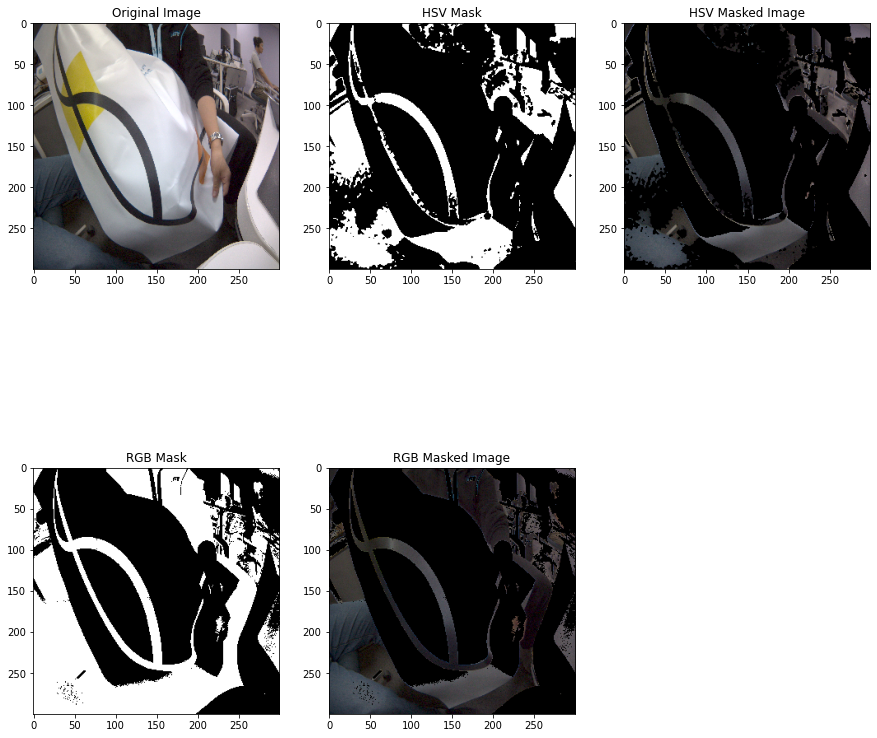

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = './test/captured_img_4.png'

# 이미지 읽기
frame = cv2.imread(image_path)

# 이미지 크기 출력
print("Height (rows):", frame.shape[0])
print("Width (columns):", frame.shape[1])
print("Data type:", frame.dtype)

# HSV 범위 설정 (검은색 범위)
lower_hsv = np.array([0, 0, 0])
upper_hsv = np.array([180, 66, 117])

# HSV 변환
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Gaussian Blur
blur = cv2.GaussianBlur(hsv_frame, (5,5), 0)

# HSV 범위를 기반으로 마스크 생성
hsv_mask = cv2.inRange(blur, lower_hsv, upper_hsv)

# HSV 마스크 결과 이미지 생성
hsv_masked_image = cv2.bitwise_and(frame, frame, mask=hsv_mask)

# RGB 범위 설정 (검은색 범위)
lower_rgb = np.array([0, 0, 0])
upper_rgb = np.array([100, 100, 100])

# RGB 범위를 기반으로 마스크 생성
rgb_mask = cv2.inRange(frame, lower_rgb, upper_rgb)

# RGB 마스크 결과 이미지 생성
rgb_masked_image = cv2.bitwise_and(frame, frame, mask=rgb_mask)

# 결과 이미지를 Matplotlib를 사용하여 표시
plt.figure(figsize=(15, 15))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('HSV Mask')
plt.imshow(hsv_mask, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('HSV Masked Image')
plt.imshow(cv2.cvtColor(hsv_masked_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.title('RGB Mask')
plt.imshow(rgb_mask, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('RGB Masked Image')
plt.imshow(cv2.cvtColor(rgb_masked_image, cv2.COLOR_BGR2RGB))

plt.show()


## hsv 마스킹 테스트
- 실시간으로 마스킹한것 보여주는 코드

In [8]:
# IPython Libraries for display and widgets
import traitlets
import ipywidgets.widgets as widgets
from IPython.display import display

# Camera and Motor Interface for JetBot
from jetbot import Robot, Camera, bgr8_to_jpeg

# Python basic pakcages for image annotation
import cv2
import imutils
import numpy as np
import time
import threading
from uuid import uuid1
import datetime
import os
import json
import glob

# Calibration 파라미터
intrinsic_parameter_path = './parameter/intrinsic_paramter.npy'
dist_coeffs_path = './parameter/distortion_coefficient.npy'
intrinsic_parameter = np.load(intrinsic_parameter_path)
dist_coeffs = np.load(dist_coeffs_path)

# ROI 설정을 위한 좌표 (사다리꼴 형태)
vertices = np.array([[(50, 300), (100, 100), (200, 100), (250, 300)]], dtype=np.int32)

# 특정 RGB, HSV 범위 설정 (필요에 따라 조정)
lower_rgb = np.array([0, 0, 0])
upper_rgb = np.array([100, 100, 100])
lower_hsv = np.array([80,90,50])
upper_hsv = np.array([110,200,255])

# ROI에서 구할 무게중심, 제어에서 쓰일 변수
x_moment, y_moment = 150, 150
flag = 0
mid = 150

# JetBot 카메라 인스턴스 생성
camera = Camera()

# 이미지 표시를 위한 위젯 생성
image_widget = widgets.Image(format='jpeg', width=300, height=300)
target_widget = widgets.Image(format='jpeg', width=300, height=300)


# 왜곡 보정해주는 함수
def callibration(img):
    global intrinsic_parameter, dist_coeffs
    undistorted_image = cv2.undistort(img, intrinsic_parameter, dist_coeffs)
    return undistorted_image


# ROI 추출 함수
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:  # Color 이미지인 경우
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:                                   
        ignore_mask_color = 255
    
    ignore_mask = cv2.fillPoly(mask, vertices, ignore_mask_color)     # 다각형 내부를 흰색으로 채우기
    roi_image = cv2.bitwise_and(img, ignore_mask)                     # 입력 이미지와 마스크 비트 연산
    return roi_image 


# 검은색만 마스킹하는 함수
def mask_rgb(img, lower_rgb, upper_rgb):
    mask_black = cv2.inRange(img, lower_rgb, upper_rgb)
    masked_img = cv2.bitwise_and(img, img, mask=mask_black)
    return masked_img


# 카메라 프레임을 업데이트하는 함수
def execute(camera_image):
    global x_moment, y_moment

    # 프레임 가져오기
    frame = np.copy(camera_image)

    # ROI 마스크 적용
    roi_frame = region_of_interest(frame, vertices)

    # RGB 마스킹 적용
    masked_frame = mask_rgb(roi_frame, lower_rgb, upper_rgb)

    # 그레이스케일 변환
    gray_frame = cv2.cvtColor(masked_frame, cv2.COLOR_BGR2GRAY)

    # Gaussian Blur
    blur_frame = cv2.GaussianBlur(gray_frame, (7,7), 0)

    # Threshold 적용, 흑백으로 변환
    _, threshold_frame = cv2.threshold(blur_frame, 100, 255, cv2.THRESH_BINARY)

    # 외곽선 찾기
    outline_frame = cv2.findContours(threshold_frame.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 가장 바깥쪽 외곽선만 찾음
    outline_list = imutils.grab_contours(outline_frame)

    # 외곽선이 있을때
    if (len(outline_list)!=0):
        c = max(outline_list, key=cv2.contourArea)
        cv2.drawContours(frame_ds,[c],-1,(0,255,255),2)     # 외곽선을 노란색으로 그린다.

        # 무게중심 찾기 -> 제일 큰 도형의 무게중심
        M = cv2.moments(c)                                  # 외곽선 'c'의 모멘트 계산
        if (M['m00']!=0):
            x_moment = int(M['m10']/M['m00'])
            y_moment = int(M['m01']/M['m00'])
            frame_ds = cv2.circle(frame_ds, (x_moment, y_moment), 3, (255,0,0), -1)    # 무게중심 이미지에 그리기


    # # 그레이스케일 threshold 이미지를 BGR로 변환
    # bgr_threshold_frame = cv2.cvtColor(threshold_frame, cv2.COLOR_GRAY2BGR)

    # 프레임을 JPEG로 변환하여 위젯에 설정
    jpeg_image = bgr8_to_jpeg(frame_ds)
    return jpeg_image


## 위젯에 연결하여 실시간으로 보여주기
time.sleep(1)
traitlets.dlink((camera, 'value'), (image_widget, 'value'), transform=bgr8_to_jpeg)
traitlets.dlink((camera, 'value'), (target_widget, 'value'), transform=execute)
display(widgets.HBox([image_widget, target_widget]))



# 제어 파트 작성 부분 
# left
if  x_moment<(mid - 50) and (flag!=1):
    Car.steering = -0.9
    flag=1
    
if x_moment < (mid - 30) and x_moment > (mid - 50) and (flag!=3):
    Car.steering = -0.2
    flag = 3

# right
if x_moment>(mid + 50) and (flag!=2):
    Car.steering = 0.9
    flag=2
if x_moment>(mid + 30) and x_moment<(mid + 50) and (flag!=4):
    Car.steering = 0.2
    flag=4

# center    
if (x_moment>(mid-30) and x_moment<(mid+30)) and (flag!=0):
    Car.steering = 0
    flag=0






## 다시 실행을 위해선 꼭! 실행해야 하는 함수!
- 관찰자와 링크, 카메라를 종료한다.

In [9]:
# 기존의 링크와 관찰자 제거 함수
def cleanup():
    global camera
    try:
        # 모든 관찰자 제거
        camera.unobserve_all()
        
        # 카메라 정지
        camera.stop()
    except Exception as e:
        print(f"Error during cleanup: {e}")
    finally:
        # 카메라 객체 삭제
        del camera

# 기존의 링크와 관찰자 제거
cleanup()

## 최종 실행 코드
- 제어도 같이

In [ ]:
# IPython Libraries for display and widgets
import traitlets
import ipywidgets.widgets as widgets
from IPython.display import display

# Camera and Motor Interface for JetBot
from jetbot import Robot, Camera, bgr8_to_jpeg

# Python basic pakcages for image annotation
import cv2
import imutils
import numpy as np
import time
import threading
from uuid import uuid1
import datetime
import os
import json
import glob

# Calibration 파라미터
intrinsic_parameter_path = './parameter/intrinsic_paramter.npy'
dist_coeffs_path = './parameter/distortion_coefficient.npy'
intrinsic_parameter = np.load(intrinsic_parameter_path)
dist_coeffs = np.load(dist_coeffs_path)

# ROI 설정을 위한 좌표 (사다리꼴 형태)
vertices = np.array([[(50, 300), (100, 100), (200, 100), (250, 300)]], dtype=np.int32)

# 특정 RGB, HSV 범위 설정 (필요에 따라 조정)
lower_rgb = np.array([0, 0, 0])
upper_rgb = np.array([100, 100, 100])
lower_hsv = np.array([80,90,50])
upper_hsv = np.array([110,200,255])

# ROI에서 구할 무게중심, 제어에서 쓰일 변수
x_moment, y_moment = 150, 150
flag = 0
mid = 150

# JetBot 카메라 인스턴스 생성
camera = Camera()

# 이미지 표시를 위한 위젯 생성
image_widget = widgets.Image(format='jpeg', width=300, height=300)
target_widget = widgets.Image(format='jpeg', width=300, height=300)


# 왜곡 보정해주는 함수
def callibration(img):
    global intrinsic_parameter, dist_coeffs
    undistorted_image = cv2.undistort(img, intrinsic_parameter, dist_coeffs)
    return undistorted_image


# ROI 추출 함수
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:  # Color 이미지인 경우
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:                                   
        ignore_mask_color = 255
    
    ignore_mask = cv2.fillPoly(mask, vertices, ignore_mask_color)     # 다각형 내부를 흰색으로 채우기
    roi_image = cv2.bitwise_and(img, ignore_mask)                     # 입력 이미지와 마스크 비트 연산
    return roi_image 


# 검은색만 마스킹하는 함수
def mask_rgb(img, lower_rgb, upper_rgb):
    mask_black = cv2.inRange(img, lower_rgb, upper_rgb)
    masked_img = cv2.bitwise_and(img, img, mask=mask_black)
    return masked_img


# 카메라 프레임을 업데이트하는 함수
def execute(camera_image):
    global x_moment, y_moment

    # 프레임 가져오기
    frame = np.copy(camera_image)

    # ROI 마스크 적용
    roi_frame = region_of_interest(frame, vertices)

    # RGB 마스킹 적용
    masked_frame = mask_rgb(roi_frame, lower_rgb, upper_rgb)

    # 그레이스케일 변환
    gray_frame = cv2.cvtColor(masked_frame, cv2.COLOR_BGR2GRAY)

    # Gaussian Blur
    blur_frame = cv2.GaussianBlur(gray_frame, (7,7), 0)

    # Threshold 적용, 흑백으로 변환
    _, threshold_frame = cv2.threshold(blur_frame, 100, 255, cv2.THRESH_BINARY)

    # 외곽선 찾기
    outline_frame = cv2.findContours(threshold_frame.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 가장 바깥쪽 외곽선만 찾음
    outline_list = imutils.grab_contours(outline_frame)

    # 외곽선이 있을때
    if (len(outline_list)!=0):
        c = max(outline_list, key=cv2.contourArea)
        cv2.drawContours(frame_ds,[c],-1,(0,255,255),2)     # 외곽선을 노란색으로 그린다.

        # 무게중심 찾기 -> 제일 큰 도형의 무게중심
        M = cv2.moments(c)                                  # 외곽선 'c'의 모멘트 계산
        if (M['m00']!=0):
            x_moment = int(M['m10']/M['m00'])
            y_moment = int(M['m01']/M['m00'])
            frame_ds = cv2.circle(frame_ds, (x_moment, y_moment), 3, (255,0,0), -1)    # 무게중심 이미지에 그리기


    # # 그레이스케일 threshold 이미지를 BGR로 변환
    # bgr_threshold_frame = cv2.cvtColor(threshold_frame, cv2.COLOR_GRAY2BGR)

    # 프레임을 JPEG로 변환하여 위젯에 설정
    jpeg_image = bgr8_to_jpeg(frame_ds)
    return jpeg_image


## 위젯에 연결하여 실시간으로 보여주기
time.sleep(1)
traitlets.dlink((camera, 'value'), (image_widget, 'value'), transform=bgr8_to_jpeg)
traitlets.dlink((camera, 'value'), (target_widget, 'value'), transform=execute)
display(widgets.HBox([image_widget, target_widget]))


# 제어 파트 작성 부분 
# left
if  x_moment<(mid - 50) and (flag!=1):
    Car.steering = -0.9
    flag=1
    
if x_moment < (mid - 30) and x_moment > (mid - 50) and (flag!=3):
    Car.steering = -0.2
    flag = 3

# right
if x_moment>(mid + 50) and (flag!=2):
    Car.steering = 0.9
    flag=2
if x_moment>(mid + 30) and x_moment<(mid + 50) and (flag!=4):
    Car.steering = 0.2
    flag=4

# center    
if (x_moment>(mid-30) and x_moment<(mid+30)) and (flag!=0):
    Car.steering = 0
    flag=0
